# EN3160 Assignment 1 

#### Name : Odil Janandith8
#### Index No : 210234H


Question 1

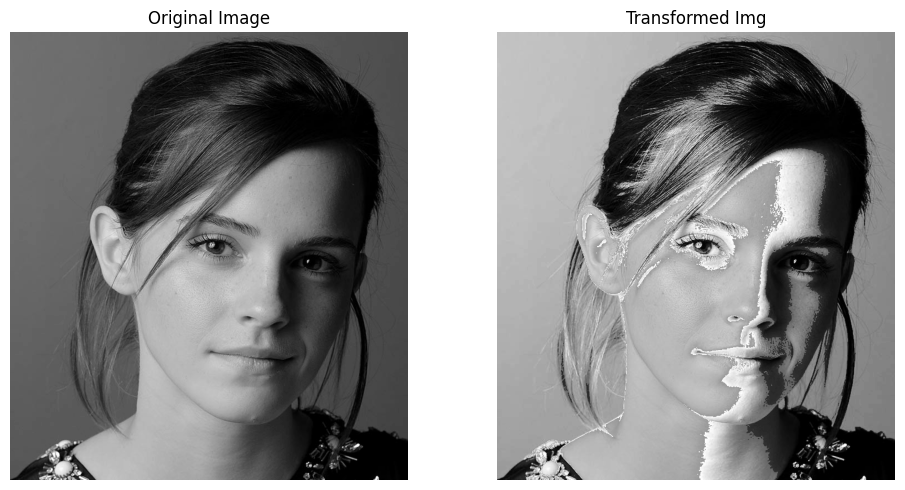

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


def intensity_T(pix):
    if 50 <= pix <= 150:
        T_pix = 1.55 * pix + 22.5 #curve
        return T_pix
    else:
        return pix
    
def intensity_T_img(img: np.ndarray) -> np.ndarray: #type conversion added %TODO
    new_img = np.zeros(img.shape, dtype=np.uint8)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel = img[i][j]
            new_img[i][j] = intensity_T(pixel)  # Calling the intesnity tranformation
    
    return new_img



# Load the image in grayscale mode
emma_img = cv2.imread("imgs/emma.jpg", cv2.IMREAD_GRAYSCALE)

# Apply the intensity transformation
emma_T_img = intensity_T_img(emma_img)

# Plot the original and transformed images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(emma_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Transformed Image
plt.subplot(1, 2, 2)
plt.imshow(emma_T_img, cmap='gray')
plt.title("Transformed Img")
plt.axis('off')

# Display the plot
plt.tight_layout()
plt.show()


Question 2

Intensity of the white point: 204
Intensity of the Grey point: 171


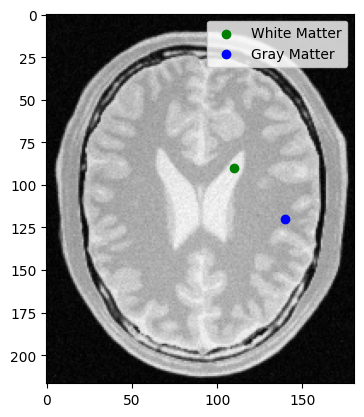

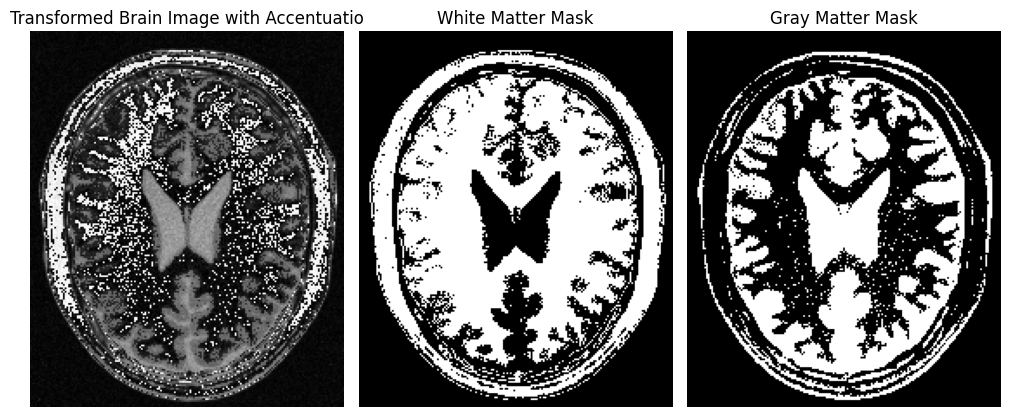

In [25]:
brain_img = cv2.imread("imgs/brain.png", cv2.IMREAD_GRAYSCALE)
#Need to take two points to assess the intensity
white_point = 110, 90
gray_point = 140, 120

plt.imshow(brain_img, cmap="gray")
plt.scatter(white_point[0], white_point[1], color='green', label='White Matter')
plt.scatter(gray_point[0], gray_point[1], color='blue', label='Gray Matter')
plt.legend()

# Get pixel values
white_intensity = brain_img[white_point]
grey_intensity = brain_img[gray_point]

# Print pixel values
print(f"Intensity of the white point: {white_intensity}")
print(f"Intensity of the Grey point: {grey_intensity}")


transformed_image = np.copy(brain_img)
    
    # Apply transformation for white matter (150 <= pixel <= 250) # gray matter is brigher than white 
gray_matter_mask = (brain_img >= 180) & ( brain_img<= 251)
transformed_image[gray_matter_mask] = 1.65 * brain_img[gray_matter_mask] + 25
    
    # Apply transformation for gray matter (50 <= pixel <= 150) # white matter is darker than gray
white_matter_mask = (brain_img >= 140) & (brain_img <= 195)
transformed_image[white_matter_mask] = 1.40 * brain_img[white_matter_mask] + 26.5

plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(transformed_image, cmap='gray')
plt.title("Transformed Brain Image with Accentuatio")
plt.axis('off')

# Transformed Image
plt.subplot(1, 3, 2)
plt.imshow(white_matter_mask, cmap='gray')
plt.title("White Matter Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_matter_mask, cmap='gray')
plt.title("Gray Matter Mask")
plt.axis('off')

# Display the plot
plt.tight_layout()
plt.show()




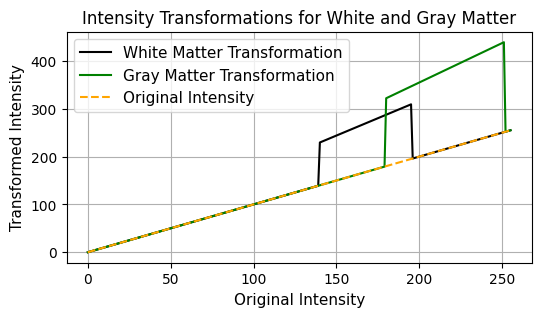

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Intensity range (0-255)
x_vals = np.arange(0, 256)

# Apply transformation for Gray Matter
gray_matter_transformed = np.array([1.65 * x + 25 if 180 <= x <= 251 else x for x in x_vals])

# Apply transformation for White Matter
white_matter_transformed = np.array([1.45 * x + 26.5 if 140 <= x <= 195 else x for x in x_vals])

# Create the plot
plt.figure(figsize=(6, 3))

# Plot White Matter Transformation
plt.plot(x_vals, white_matter_transformed, label='White Matter Transformation', color='black')

# Plot Gray Matter Transformation
plt.plot(x_vals, gray_matter_transformed, label='Gray Matter Transformation', color='green')

# Plot Identity line (Original Intensity)
plt.plot(x_vals, x_vals, label='Original Intensity', linestyle='--', color='orange')

# Add labels, title, and legend
plt.title('Intensity Transformations for White and Gray Matter', fontsize=12)
plt.xlabel('Original Intensity', fontsize=11)
plt.ylabel('Transformed Intensity', fontsize=11)
plt.legend(loc='upper left', fontsize=11)
plt.grid(True)

# Display the plot
plt.show()


Question 3

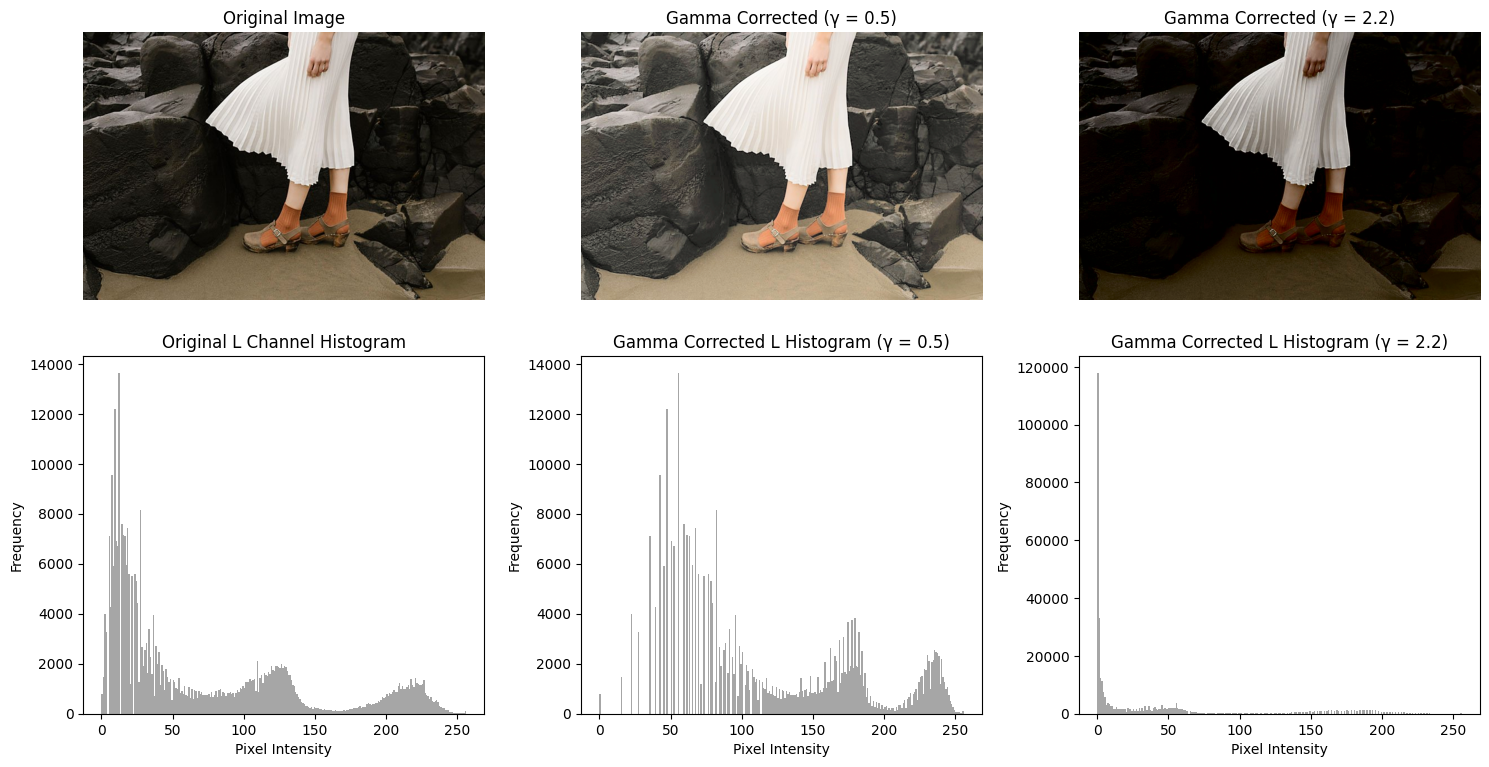

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_gamma_correction(image_path, gamma):
    """
    Applies gamma correction to the L* channel of an image in L*a*b* color space.
    """
    # Load the image in RGB
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image from RGB to L*a*b* color space
    image_lab = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2LAB)

    # Split the LAB image into L, a, and b channels
    L, a, b = cv2.split(image_lab)

    # Apply gamma correction to the L channel
    L_normalized = L / 255.0  # Normalize L to [0, 1] range
    L_corrected = np.power(L_normalized, gamma)  # Apply gamma correction
    L_corrected = (L_corrected * 255).astype(np.uint8)  # Rescale to [0, 255]

    # Merge the corrected L channel back with the original a and b channels
    image_lab_corrected = cv2.merge((L_corrected, a, b))

    # Convert the corrected LAB image back to RGB color space
    corrected_image = cv2.cvtColor(image_lab_corrected, cv2.COLOR_LAB2RGB)

    return corrected_image, L, L_corrected

# Original and corrected images
image = cv2.imread("imgs/highlights_and_shadows.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Gamma correction with γ = 0.5 and γ = 2.2
gamma_0_5, L_original, L_corrected_0_5 = apply_gamma_correction("imgs/highlights_and_shadows.jpg", 0.5)
gamma_2_2, _, L_corrected_2_2 = apply_gamma_correction("imgs/highlights_and_shadows.jpg", 2.2)

# Plot the original and gamma-corrected images
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(gamma_0_5)
plt.title('Gamma Corrected (γ = 0.5)')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(gamma_2_2)
plt.title('Gamma Corrected (γ = 2.2)')
plt.axis('off')

# Plot histograms of the L channel before and after gamma correction
plt.subplot(2, 3, 4)
plt.hist(L_original.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Original L Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
plt.hist(L_corrected_0_5.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Gamma Corrected L Histogram (γ = 0.5)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
plt.hist(L_corrected_2_2.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Gamma Corrected L Histogram (γ = 2.2)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Question 4